In [1]:
import pickle
import numpy as np
import torch
import matplotlib.pyplot as plt
import utils
import stats
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set()

In [2]:
def undistort(im,idx):
    shape = im.shape
    im_flat = im.flatten('F')
    im_flat = im_flat[idx]
    return np.reshape(im_flat,(shape[0], shape[1]),'F')

def xy_to_flat(x, y, n_rows, n_cols):
    return x * n_rows + y

def flat_to_xy(f, n_rows, n_cols):
    x = f // n_rows
    y = f % n_rows
    return y, x

# Loading LP3D Predictions

In [14]:
#LiftPose3D prediction
data = torch.load('./data/mouse/test_results.pth.tar')
print(data['output'].shape)
tar_mean = torch.load('./data/mouse/stat_3d.pth.tar')['mean']
tar_std = torch.load( './data/mouse/stat_3d.pth.tar')['std']
targets_1d = torch.load( './data/mouse/stat_3d.pth.tar')['targets_1d']
tar_offset = np.vstack(torch.load('./data/mouse/stat_3d.pth.tar')['offset'].values())
good_keypts = utils.add_roots(data['good_keypts'],targets_1d,len(tar_mean)).astype(bool)

inp_mean = torch.load('./data/mouse/stat_2d.pth.tar')['mean']
inp_std = torch.load('./data/mouse/stat_2d.pth.tar')['std']
targets_2d = torch.load('./data/mouse/stat_2d.pth.tar')['targets_2d']
inp_offset = np.vstack(torch.load('./data/mouse/stat_2d.pth.tar')['offset'].values())

tar = stats.unNormalize(data['target'], tar_mean[targets_1d], tar_std[targets_1d])
tar = utils.add_roots(tar,targets_1d,len(tar_mean))
tar += tar_offset
out = stats.unNormalize(data['output'], tar_mean[targets_1d], tar_std[targets_1d])
out = utils.add_roots(out,targets_1d,len(tar_mean))
out += tar_offset
inp = stats.unNormalize(data['input'], inp_mean[targets_2d], inp_std[targets_2d])
inp = utils.add_roots(inp,targets_2d,len(inp_mean))
inp += inp_offset

chosen_keypts = [0,1,2,3,4,5,6]
inp[inp==0]=np.NaN
out[out==0]=np.NaN
tar[tar==0]=np.NaN

bottom_x, bottom_y = inp[:,::2], inp[:,1::2]
side_x, side_y = inp[:,::2], tar
side_x_pred, side_y_pred = inp[:,::2], out

bottom_x, bottom_y = bottom_x[:,chosen_keypts], bottom_y[:,chosen_keypts]
side_x, side_y = side_x[:,chosen_keypts], side_y[:,chosen_keypts]
side_x_pred, side_y_pred = side_x_pred[:,chosen_keypts], side_y_pred[:,chosen_keypts]
good_keypts = good_keypts[:,chosen_keypts]


poses = pickle.load(open('./data/mouse/G6AE1_100_27_1_control_S3T12.pkl', 'rb'))
index = pickle.load(open('./data/mouse/G6AE1_100_27_1_control_S3T12.pkl', 'rb'))["index"]

i = 0
img = plt.imread('./data/mouse/img{:03d}.png'.format(index[i]))
s = img.shape
x_ind, y_ind = flat_to_xy(np.squeeze(poses["distort"]), img.shape[0], img.shape[1])

(462, 6)


/home/user/.local/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  import sys
/home/user/.local/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  del sys.path[0]


In [3]:
#LiftPose3D prediction
data = torch.load('./out/test_results.pth.tar')
print(data['output'].shape)

tar_mean = torch.load('./out/stat_3d.pth.tar')['mean']
tar_std = torch.load( './out/stat_3d.pth.tar')['std']
targets_1d = torch.load( './out/stat_3d.pth.tar')['targets_3d']
tar_offset = np.vstack(torch.load('./out/stat_3d.pth.tar')['offset'].values())
good_keypts = utils.add_roots(data['good_keypts'],targets_1d,len(tar_mean)).astype(bool)

inp_mean = torch.load('./out/stat_2d.pth.tar')['mean']
inp_std = torch.load('./out/stat_2d.pth.tar')['std']
targets_2d = torch.load('./out/stat_2d.pth.tar')['targets_2d']
inp_offset = np.vstack(torch.load('./out/stat_2d.pth.tar')['offset'].values())

tar = stats.unNormalize(data['target'], tar_mean[targets_1d], tar_std[targets_1d])
tar = utils.add_roots(tar,targets_1d,len(tar_mean))
tar += tar_offset
out = stats.unNormalize(data['output'], tar_mean[targets_1d], tar_std[targets_1d])
out = utils.add_roots(out,targets_1d,len(tar_mean))
out += tar_offset
inp = stats.unNormalize(data['input'], inp_mean[targets_2d], inp_std[targets_2d])
inp = utils.add_roots(inp,targets_2d,len(inp_mean))
inp += inp_offset

chosen_keypts = [0,1,2,3,4,5,6]
inp[inp==0]=np.NaN
out[out==0]=np.NaN
tar[tar==0]=np.NaN

inp = inp[:462]
out = out[:462]
tar = tar[:462]

bottom_x, bottom_y = inp[:,::2], inp[:,1::2]
side_x, side_y = inp[:,::2], tar
side_x_pred, side_y_pred = inp[:,::2], out

bottom_x, bottom_y = bottom_x[:,chosen_keypts], bottom_y[:,chosen_keypts]
side_x, side_y = side_x[:,chosen_keypts], side_y[:,chosen_keypts]
side_x_pred, side_y_pred = side_x_pred[:,chosen_keypts], side_y_pred[:,chosen_keypts]
good_keypts = good_keypts[:,chosen_keypts]


poses = pickle.load(open('./data/mouse/G6AE1_100_27_1_control_S3T12.pkl', 'rb'))
index = pickle.load(open('./data/mouse/G6AE1_100_27_1_control_S3T12.pkl', 'rb'))["index"]

i = 0
img = plt.imread('./data/mouse/img{:03d}.png'.format(index[i]))
s = img.shape
x_ind, y_ind = flat_to_xy(np.squeeze(poses["distort"]), img.shape[0], img.shape[1])

(10814, 6)


/home/user/.local/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  
/home/user/.local/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  


# Loading Manual Annotations

In [4]:
d = pd.read_csv('./data/mouse/ManualAnnotation.csv')
d_np = d.to_numpy()
img_name_list = list()
kp = list()
for i in range(3, d_np.shape[0]):
    img_name_list.append(d_np[i][0])
    kp.append(d_np[i][1:])
kp = np.array(kp)
is_full = np.logical_not(pd.isnull(np.array(kp)).sum(axis=1).astype(np.bool))
kp = kp[is_full, :].astype(np.float32)
kp = kp.reshape(kp.shape[0], 6, 2)

img_name_list = np.array(img_name_list)[is_full]
img_name_list = [int(img_name.split('/')[-1].replace('img', '').replace('.png', '')) for img_name in img_name_list]

for kp_idx in range(kp.shape[0]):
    for k in range(6):
        pts = kp[kp_idx]
        x, y = pts[k, :].astype(int)
        try:
            x_und, y_und = flat_to_xy(np.where(np.logical_and(x_ind==y, y_ind==x))[0][0], s[0], s[1])
            kp[kp_idx, k, 0 ] = y_und
            kp[kp_idx, k, 1 ] = x_und
        except:
            kp[kp_idx, :] = 0
            continue
            
rot = [2, 4, 1, 3, 0, 5]
kp = kp[:, rot]

# Loading LocoMouse Annotations

In [5]:
kp_loco = np.zeros((517, 7, 2))
kp_loco[index, :, 0] = side_x
kp_loco[index, :, 1] = side_y
kp_loco_selected = kp_loco[img_name_list]

kp_pred = np.zeros((517, 7, 2))
kp_pred[index, :, 0] = side_x_pred
kp_pred[index, :, 1] = side_y_pred
kp_pred_selected = kp_pred[img_name_list]

(0.0, 50.0)

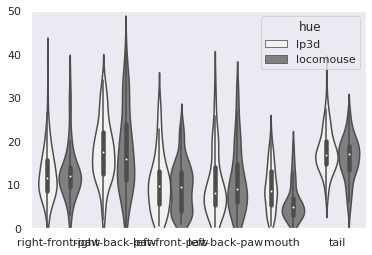

In [6]:
lp3d = np.zeros((104, 6, 2))

names_joint = ['mouth', 'left-front-paw', "right-front-paw", "left-back-paw",  "right-back-paw", "tail"]
names_joint_rot = np.array(names_joint)[rot]

err_norm = list()
err_joint = list()
err_hue = list()
for img_id in range(kp.shape[0]):
    if np.any(kp[img_id]==0) or np.any(kp_pred_selected[img_id]==0) or np.any(pd.isnull(kp[img_id])) or np.any(pd.isnull(kp_pred_selected[img_id])):
        continue
    for j_id in range(6):
        err_norm.append(np.sum(np.abs(kp[img_id][j_id]-kp_pred_selected[img_id][j_id])))
        err_joint.append(names_joint_rot[j_id])
        err_hue.append('lp3d')

for img_id in range(kp.shape[0]):
    if np.any(kp[img_id]==0) or np.any(kp_loco_selected[img_id]==0) or np.any(pd.isnull(kp[img_id])) or np.any(pd.isnull(kp_loco_selected[img_id])):
        continue
    for j_id in range(6):
        err_norm.append(np.sum(np.abs(kp[img_id][j_id]-kp_loco_selected[img_id][j_id])))
        err_joint.append(names_joint_rot[j_id])
        err_hue.append('locomouse')
        
d = pd.DataFrame({"err":err_norm, "joint": err_joint, "hue": err_hue})
q = d.quantile(q=0.95)
d = d.loc[d['err'] < q['err']]

#plt.figure(dpi=100)
plt.figure()
plt.grid(False)
sns.violinplot(x="joint" , y="err", hue='hue', data=d, color='gray')
plt.xlabel('')
plt.ylabel('')
plt.ylim([0,50])
#plt.savefig('/results/Figure_2G.png')